# DA Final project:

# Group 5

# Shark Attack

###  Name of students:
Ohad Rosenson<br>
Yoav Yekutiel<br>
Daniel Greenfeld<br>

<br>taken from [Kaggle](https://www.kaggle.com/datasets/felipeesc/shark-attack-dataset)
<br>The source of the details in kaggle is taken from the Shark Research Institute, Inc.(https://www.sharks.org/)




<a id='top'></a>

<div>
<img src="https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/shark-swimming-water-1200x800.webp" width="500"/>
<div>


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Information of the data
The target of our project is to find details that affect shark attacks on people and to minimize these attacks. 


In [1]:
url1 = 'https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/sharck_attack_part_2UPD.csv'#כשפיצלנו את הקובץ , לאחר הפיצול נשארו בקובץ המון שורות ריקות ולכן יצרנו משתנה חדש שבו מצויות רק שורות עם נתונים
df = pd.read_csv(url1)
shark_df2 = df.iloc[:2809]
url2 = 'https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/sharck_attack_part_1UPD.csv'
shark_df1 = pd.read_csv(url2)
shark_df = pd.concat([shark_df1 ,shark_df2]).reset_index()
shark_df.shape

NameError: name 'pd' is not defined

In [36]:
shark_df.columns


Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [37]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6309 entries, 0 to 6308
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   6309 non-null   int64  
 1   Case Number             6308 non-null   object 
 2   Date                    6302 non-null   object 
 3   Year                    6300 non-null   float64
 4   Type                    6298 non-null   object 
 5   Country                 6252 non-null   object 
 6   Area                    5847 non-null   object 
 7   Location                5762 non-null   object 
 8   Activity                5758 non-null   object 
 9   Name                    6092 non-null   object 
 10  Sex                     5737 non-null   object 
 11  Age                     3471 non-null   object 
 12  Injury                  6274 non-null   object 
 13  Fatal (Y/N)             5763 non-null   object 
 14  Time                    2948 non-null   

In [38]:
shark_df.isnull().sum()

index                        0
Case Number                  1
Date                         7
Year                         9
Type                        11
Country                     57
Area                       462
Location                   547
Activity                   551
Name                       217
Sex                        572
Age                       2838
Injury                      35
Fatal (Y/N)                546
Time                      3361
Species                   2845
Investigator or Source      24
pdf                          7
href formula                 8
href                         7
Case Number.1                7
Case Number.2                7
original order               0
Unnamed: 22               6308
Unnamed: 23               6307
dtype: int64

# Arranging the columns:

### We arrange the data for each column: we removed values that are not relevant, connected columns with the same meaning and created new columns that are relevant.

In [39]:
counts_of_each_activity = shark_df['Activity'].value_counts() #סידור מחדש עבור activity
frequent_activities = counts_of_each_activity[counts_of_each_activity >= 50].index
shark_df['Frequent_Activity'] = shark_df['Activity'].apply(lambda x: x if x in frequent_activities else pd.NA) # יצירת עמודה חדשה שבה מצויים כלל הפעילויות שמופיעות מעל 50 פעם בdata
shark_df['Frequent_Activity'].unique()
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Scuba diving': 'Diving','Snorkeling': 'Diving'}) #איחוד המשתנים כך שכל סוגי הצלילה ייכנסו תחת הקבוצה של הצלילה הכולל
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Spearfishing':'Fishing'})
shark_df['Frequent_Activity'] = shark_df['Frequent_Activity'].replace({'Body boarding':'Surfing'})
shark_df['Frequent_Activity'].unique()

array([<NA>, 'Standing', 'Surfing', 'Swimming', 'Fishing', 'Diving',
       'Wading', 'Bathing'], dtype=object)

In [40]:
counts_of_species= shark_df['Species '].value_counts() # סידור עמודת Species
frequent_species = counts_of_species[counts_of_species >= 10].index
shark_df['Species'] = shark_df['Species '].apply(lambda x: x if x in frequent_species else pd.NA)
shark_df['Species'] = shark_df['Species'].apply(lambda x: 'Shark involvement not confirmed' if pd.notnull(x) and 'confirmed' in x else x)
shark_df['Species'] = shark_df['Species'].apply(lambda x: 'white shark' if pd.notnull(x) and 'hite' in x else x)
shark_df['Species'] = shark_df['Species'].replace({"Questionable":"Questionable incident"})
shark_df['Species'].unique()

array(['white shark', <NA>, '2 m shark', 'Tiger shark',
       'Shark involvement not confirmed', 'Questionable incident',
       '3 m shark', "6' shark", 'Bull shark', 'Wobbegong shark',
       'Blacktip shark', "5' shark", "4' to 5' shark", 'Nurse shark',
       "4' shark", "3' shark", "10' shark", "3' to 4' shark", 'Invalid',
       'Blue shark', 'Mako shark', 'No shark involvement', '1.5 m shark',
       "7' shark", 'Grey nurse shark', 'Raggedtooth shark',
       'Zambesi shark', 'Bronze whaler shark', '"a small shark"',
       "12' shark", "1.8 m [6'] shark", "3 m [10'] shark",
       "2.4 m [8'] shark", "1.2 m [4'] shark",
       "1.2 m to 1.5 m [4' to 5'] shark", "1.5 m [5'] shark",
       "3.7 m [12'] shark"], dtype=object)

In [41]:
shark_df['Fatal (Y/N)'] = shark_df['Fatal (Y/N)'].replace({" N":"N","y":"Y"}) # סידור fatal 
counts_of_fatal_incident = shark_df["Fatal (Y/N)"].value_counts()
fatal_incident = counts_of_fatal_incident[counts_of_fatal_incident >= 10].index
fatal_incident
shark_df['fatal_incident'] = shark_df['Fatal (Y/N)'].apply(lambda x: x if x in fatal_incident else pd.NA)
shark_df['fatal_incident'] = shark_df['fatal_incident'].replace('UNKNOWN', pd.NA)

shark_df['fatal_incident'].unique()

array(['N', 'Y', <NA>], dtype=object)

In [42]:
shark_df['Sex'] = shark_df['Sex '].replace('M ', 'M')
shark_df['Sex'] = shark_df['Sex '].map({'M':'M','F':'F'})
shark_df['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [43]:
top_15 = shark_df['Country'].value_counts().head(15)
shark_df['Top_Country'] = shark_df['Country'].apply(lambda x: x if x in top_15.index else None)
shark_df['Top_Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', None, 'SOUTH AFRICA',
       'BAHAMAS', 'NEW CALEDONIA', 'CUBA', 'NEW ZEALAND', 'REUNION',
       'PHILIPPINES', 'MOZAMBIQUE', 'FIJI', 'ITALY', 'PAPUA NEW GUINEA'],
      dtype=object)

In [44]:
shark_df['D_Time'] = shark_df['Time'].str.replace('h', ':', regex=False)
shark_df['D_Time'] = pd.to_datetime(shark_df['D_Time'], format='%H:%M', errors='coerce')
shark_df['Time_Category'] = pd.cut(shark_df['D_Time'].dt.hour, bins=[0, 12, 18, 24], labels=['Morning', 'Noon', 'evening'], right=False)
shark_df['Time_Category'] .unique()

['evening', NaN, 'Morning', 'Noon']
Categories (3, object): ['Morning' < 'Noon' < 'evening']

In [45]:
shark_df['Injury_Types'] = shark_df['Injury'].apply(lambda x: 'bite' if pd.notnull(x) and 'bit' in x else ('No injury' if pd.notnull(x) and 'No injury' in x else x))
top_Injury= shark_df['Injury_Types'].value_counts().head(20).index
shark_df['Top_Injury'] = shark_df['Injury_Types'].apply(lambda x: x if x in top_Injury else 'NON')
shark_df['Top_Injury'].unique()

array(['No injury', 'NON', 'bite', 'FATAL', 'Lacerations to left foot',
       'Minor injuries', 'Lacerations to right foot',
       'Lacerations to foot', 'Leg injured', 'Laceration to left foot',
       'Lacerations to right hand', 'Lacerations to leg', 'Minor injury',
       'No details', 'Leg severed', 'Survived', 'Foot severed',
       'Foot lacerated', 'FATAL, leg severed ',
       'FATAL, body not recovered', 'Leg lacerated'], dtype=object)

In [46]:
shark_df['Date'] = pd.to_datetime(shark_df['Date'], errors='coerce')
shark_df['Month'] = shark_df['Date'].dt.month
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
shark_df['Month'] = shark_df['Month'].map(month_map)
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
shark_df['Month'] = pd.Categorical(shark_df['Month'], categories=months_order, ordered=True)
shark_df['Month'].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_23804\1889162049.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  shark_df['Date'] = pd.to_datetime(shark_df['Date'], errors='coerce')


['June', 'May', NaN, 'April', 'March', ..., 'November', 'October', 'September', 'August', 'July']
Length: 13
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [47]:
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')
shark_df['age_bins'] = pd.cut(shark_df['Age'], bins = 3, labels = ('young', 'middle_age', 'old' ))
shark_df['age_bins'].value_counts()

age_bins
young         2189
middle_age    1065
old            115
Name: count, dtype: int64

In [48]:
Total_Year = shark_df[shark_df['Year']> 1950]
shark_df['Top_Year'] = Total_Year['Year']
shark_df['Top_Year'].value_counts()

Top_Year
2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1971.0     28
1973.0     27
1977.0     26
1979.0     25
1978.0     25
Name: count, Length: 68, dtype: int64

In [49]:
shark_df.columns

Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order',
       'Unnamed: 22', 'Unnamed: 23', 'Frequent_Activity', 'Species',
       'fatal_incident', 'Sex', 'Top_Country', 'D_Time', 'Time_Category',
       'Injury_Types', 'Top_Injury', 'Month', 'age_bins', 'Top_Year'],
      dtype='object')

## General information that the data shows

In this part, we show the basic information of the data before we start the process:
We can see that 80 percent of those attacked are male and 10 percent are female the remaining 10 percent are unknown.
In addition, more than 20 percent of the attacks are fatal and the median age attakcked is 27-28 years old.

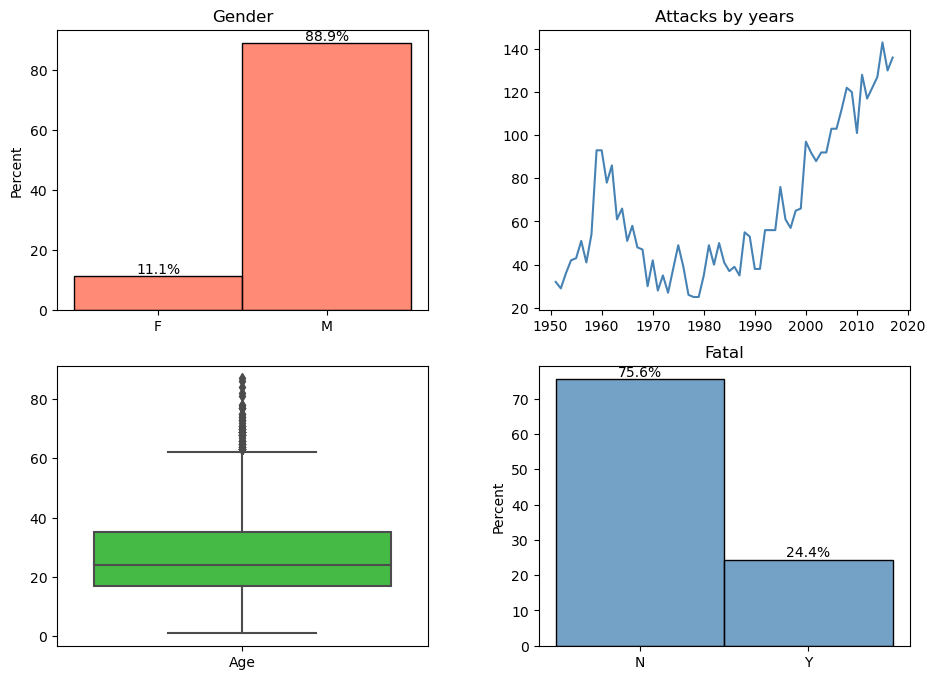

In [50]:
fig, ax = plt.subplots(2,2, figsize = (11,8))
plt.subplots_adjust(wspace = 0.3)
attacks_by_year = shark_df['Top_Year'].value_counts().sort_index()
attacks_by_relevant_year = attacks_by_year[attacks_by_year.index <= 2017]
sns.histplot(data=shark_df, x ='Sex',stat = 'percent',ax = ax[0,0],color='#FF6347')
ax[0,0].set_xlabel(' ')
ax[0, 0].set_title('Gender')
for p in ax[0, 0].patches:
    ax[0, 0].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
sns.lineplot(x=attacks_by_relevant_year.index, y=attacks_by_relevant_year.values, ax = ax[0,1],color='#4682B4')
ax[0,1].set_xlabel('')
ax[0, 1].set_title('Attacks by years')
sns.boxplot(data = shark_df[['Age']], ax = ax[1,0],color='#32CD32')
ax[1,0].set_xlabel(' ')
ax[1, 0].set_title('')
sns.histplot(data = shark_df , x = 'fatal_incident',stat = 'percent',color = '#4682B4',ax = ax[1,1])
ax[1, 1].set_xlabel('')
ax[1, 1].set_title('Fatal')
for p in ax[1, 1].patches:
    ax[1, 1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


plt.show()


### First Conclusion:

#### In which period or month of the year is the number of attacks the highest? Are they fatal or not, where do they occur, and in what way do they impact?

<div>
<img src="https://raw.githubusercontent.com/YoavYekutiel/Project-attacks/main/warning-signboard-concept-with-shark-sighted-no-swimming_1308-105725.avif" width="350"/>
</div>


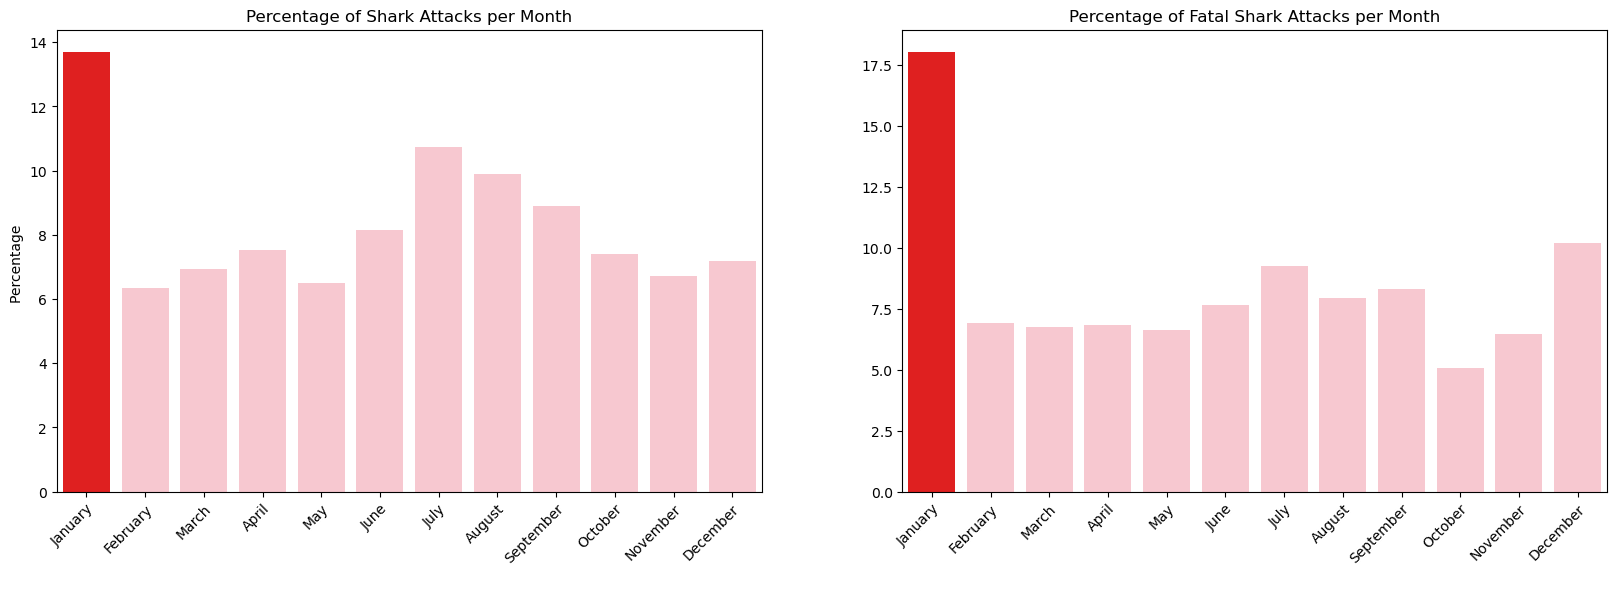

In [51]:

attacks_by_month = shark_df.groupby('Month').size()
percentage_by_month = (attacks_by_month / attacks_by_month.sum()) * 100
percentage_by_month = percentage_by_month.reindex(months_order)

fatal_by_month = shark_df[shark_df['Fatal (Y/N)'] == 'Y'].groupby('Month').size()
fatal_percentages = (fatal_by_month / fatal_by_month.sum()) * 100
fatal_percentages = fatal_percentages.reindex(months_order)

colors_attack = ['red' if month == 'January' else 'pink' for month in percentage_by_month.index]
colors_fatal = ['red' if month == 'January' else 'pink' for month in fatal_percentages.index]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.subplots_adjust(wspace=0.2)

sns.barplot(x=percentage_by_month.index, y=percentage_by_month.values, palette=colors_attack, ax=ax[0])
ax[0].set_title('Percentage of Shark Attacks per Month')
ax[0].set_xlabel(' ')
ax[0].set_ylabel('Percentage ')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

sns.barplot(x=fatal_percentages.index, y=fatal_percentages.values, palette=colors_fatal, ax=ax[1])
ax[1].set_title('Percentage of Fatal Shark Attacks per Month')
ax[1].set_xlabel(' ')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.show()


In [52]:
shark_df['Top_Country'].value_counts()

Top_Country
USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
Name: count, dtype: int64

In [53]:
shark_df['Location'].value_counts()

Location
New Smyrna Beach, Volusia County                  163
Daytona Beach, Volusia County                      30
Ponce Inlet, Volusia County                        20
Melbourne Beach, Brevard County                    18
Myrtle Beach, Horry County                         17
                                                 ... 
Whale Beach                                         1
l'Anse-Vata                                         1
Hole-in-the Wall                                    1
Wreck of the Navy Barge, 22 miles SE of Rudee       1
Below the English fort, Trincomalee                 1
Name: count, Length: 4108, dtype: int64

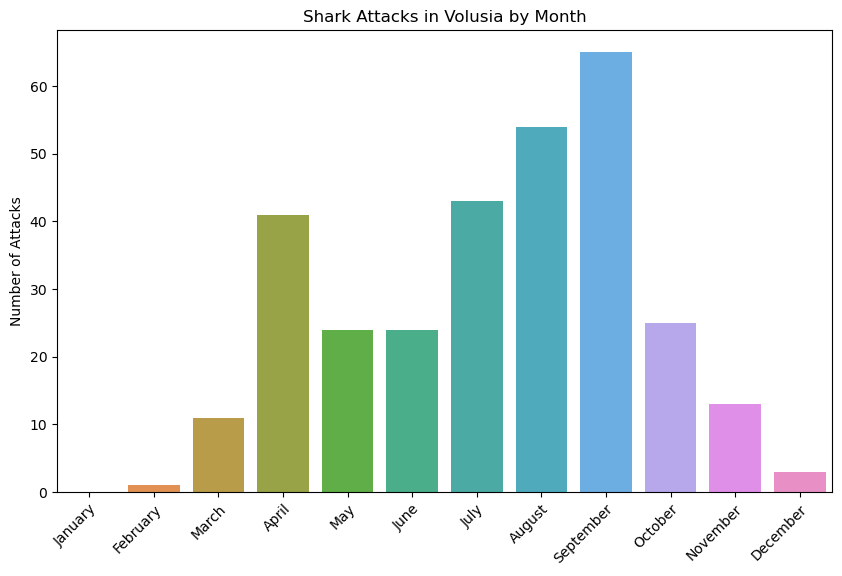

In [54]:
Volusia_attack = shark_df[shark_df['Location'].str.contains('Volusia', na=False)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=Volusia_attack, x='Month', ax=ax )

# כותרות לצירים ולגרף
ax.set_title('Shark Attacks in Volusia by Month')
ax.set_xlabel('')
ax.set_ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor' )
# הצגת הגרף
plt.show()

It can be seen that the location where the most attacks occur is in Volusia, Florida, and the month in which the most attacks occur is January.
What is surprising is that in the location where the most attacks occur, there are no attacks at all during the most common month.

#### Australia having the most attacks in January, including fatal ones


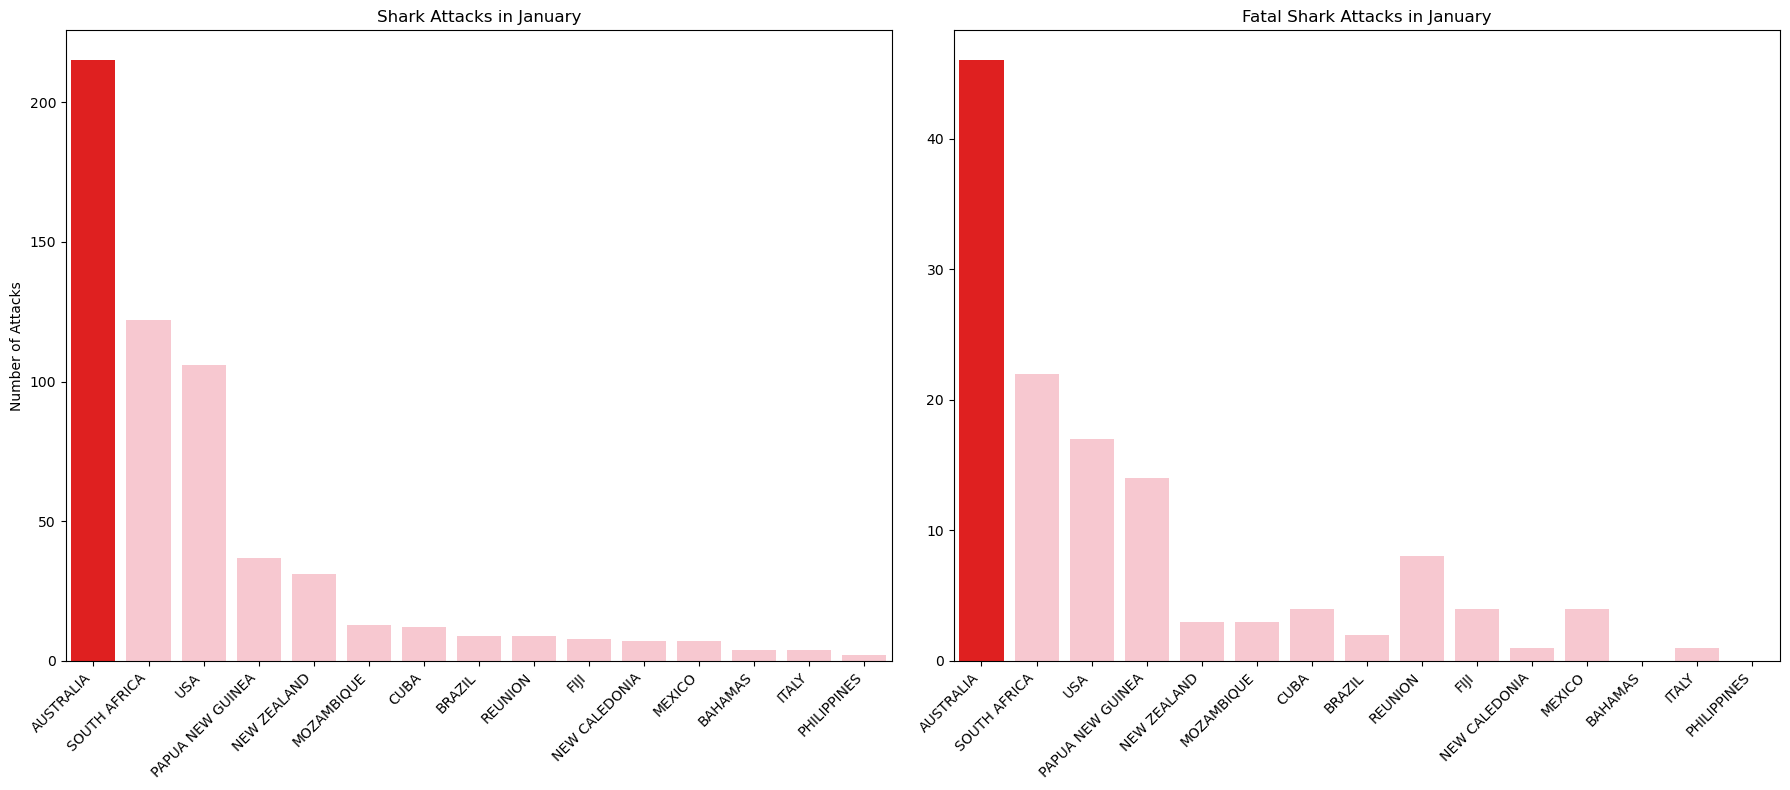

In [55]:
January_attacks = shark_df[shark_df['Month'] == 'January']
January_fatal_attacks = shark_df[(shark_df['Month'] == 'January') & (shark_df['fatal_incident'] == 'Y')]

most_common_Country_January = January_attacks['Top_Country'].value_counts().idxmax()

order_count = January_attacks['Top_Country'].value_counts().index

colors = ['pink' if country != most_common_Country_January else 'red' for country in order_count]

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=January_attacks, x='Top_Country', order=order_count, palette=colors, ax=ax[0])
ax[0].set_title('Shark Attacks in January')
ax[0].set_xlabel('')
ax[0].set_ylabel('Number of Attacks')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(data=January_fatal_attacks, x='Top_Country', order=order_count, palette=colors, ax=ax[1])
ax[1].set_title('Fatal Shark Attacks in January')
ax[1].set_xlabel('')
ax[1].set_ylabel(' ')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### The focus on the younger age group and comparing Australian data to worldwide data for young people

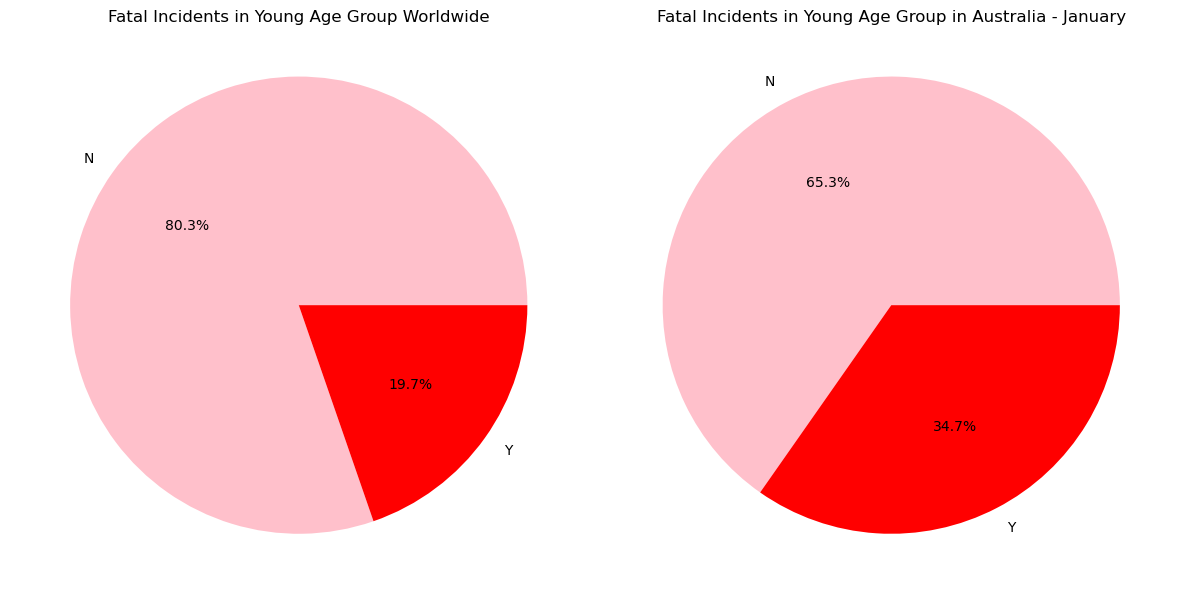

In [56]:
fatal_percent_worldwide = shark_df[shark_df['age_bins'] == 'young']['fatal_incident'].value_counts(normalize=True) * 100

fatal_percent_australia_jan = shark_df[(shark_df['age_bins'] == 'young') &
                                       (shark_df['Top_Country'] == 'AUSTRALIA') &
                                       (shark_df['Month'] == 'January')]['fatal_incident'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(fatal_percent_worldwide, labels=fatal_percent_worldwide.index, autopct='%1.1f%%', colors=['pink', 'red'])
ax[0].set_title('Fatal Incidents in Young Age Group Worldwide')
ax[0].axis('equal') 

ax[1].pie(fatal_percent_australia_jan, labels=fatal_percent_australia_jan.index, autopct='%1.1f%%', colors=['pink', 'red'])
ax[1].set_title('Fatal Incidents in Young Age Group in Australia - January')
ax[1].axis('equal')  

plt.tight_layout()
plt.show()

In [57]:
shark_df['Frequent_Activity'].value_counts()

Frequent_Activity
Surfing     1032
Swimming     869
Fishing      764
Diving       292
Bathing      162
Wading       149
Standing      99
Name: count, dtype: int64

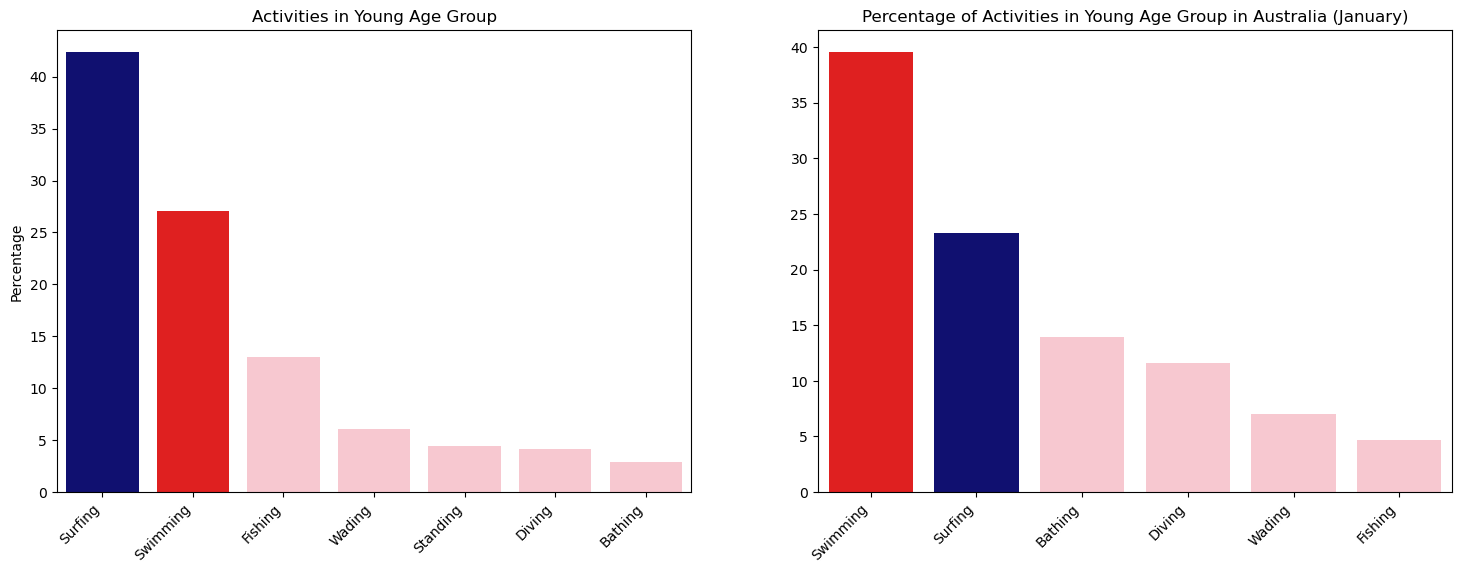

In [58]:
young_fatal_jan_Aus = shark_df[(shark_df['age_bins'] == 'young') & 
                                    (shark_df['Month'] == 'January') & 
                                    (shark_df['Top_Country'] == 'AUSTRALIA')]
total = len(young_fatal_jan_Aus)
activity_percentages_by_young_jan_Aus = young_fatal_jan_Aus['Frequent_Activity'].value_counts(normalize=True) * 100

activity_percentages_by_young = shark_df[shark_df['age_bins'] == 'young']['Frequent_Activity'].value_counts(normalize=True) * 100


colors1 = ['Navy' if activity == 'Surfing' else 'red' if activity == 'Swimming' else 'pink' for activity in activity_percentages_by_young.index]
colors2 = ['Navy' if activity == 'Surfing' else 'red' if activity == 'Swimming' else 'pink' for activity in activity_percentages_by_young_jan_Aus.index]

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x=activity_percentages_by_young.index, y=activity_percentages_by_young.values, palette=colors1, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[0].set_title('Activities in Young Age Group')
ax[0].set_xlabel('')
ax[0].set_ylabel('Percentage')

sns.barplot(x=activity_percentages_by_young_jan_Aus.index, y=activity_percentages_by_young_jan_Aus.values, palette=colors2 ,ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_title('Percentage of Activities in Young Age Group in Australia (January)')
ax[1].set_xlabel('')
plt.show()

We examined which month has the most attacks and found that January has the highest number of attacks and also the most fatal attacks, with Australia being the country where the most attacks occur. Since the younger age group is at the median, we wanted to investigate what happens to young people in Australia in January compared to attacks on young people worldwide, in the context of fatal attacks. In conclusion, we discovered that for the younger age group, there is the highest number of fatal attacks in January compared to other months, and the most common activity during these attacks is swimming.

## Conclusion 2:


#### Which marine activity leads to the most fatal attacks, and which countries are considered outliers in relation to these activities?

<a id='top'></a>

<div>
<img src="https://github.com/YoavYekutiel/Project-attacks/blob/main/20431565_1619620661415689_312998309479718354_n.jpg?raw=true" width="600"/>
<div>

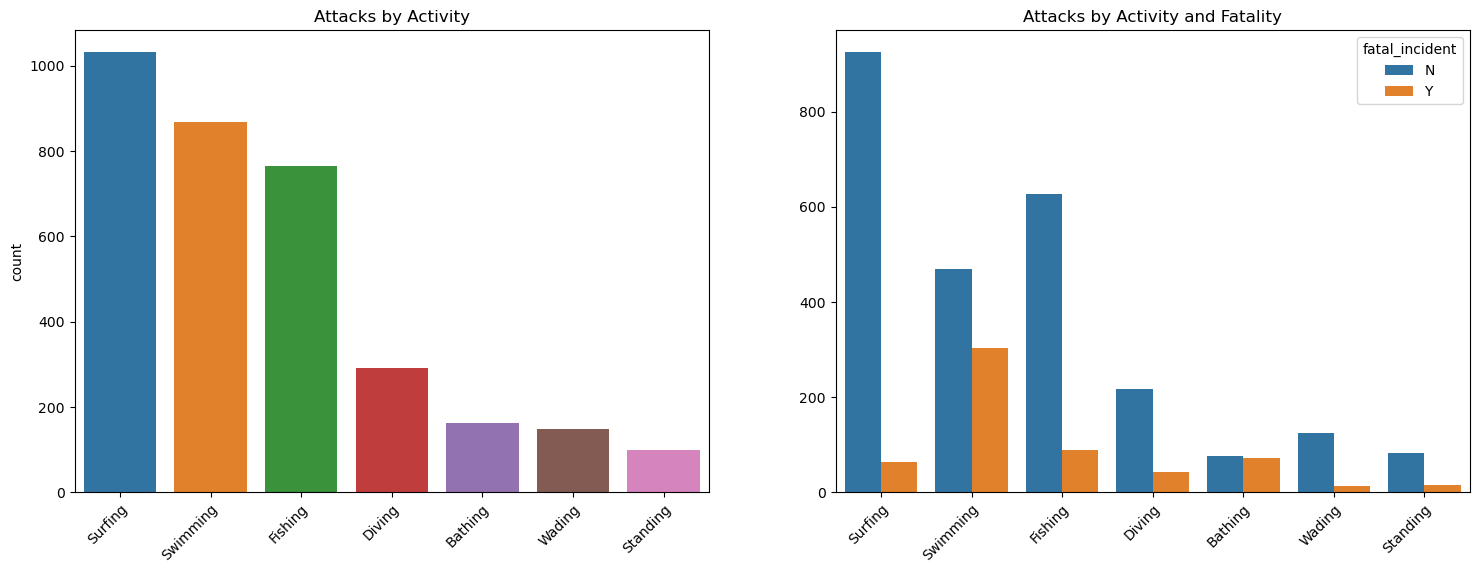

In [59]:

attacks_by_activity = shark_df['Frequent_Activity'].value_counts().index
# Create figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(data=shark_df, x='Frequent_Activity', order=attacks_by_activity, ax=ax[0])
sns.countplot(data=shark_df, x='Frequent_Activity',hue= 'fatal_incident',ax=ax[1],order = attacks_by_activity)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')   

plt.subplots_adjust(wspace=0.2)
ax[0].set_title('Attacks by Activity')
ax[1].set_title('Attacks by Activity and Fatality')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.show()

In the left countplot, it can be seen that the most common activity in shark attack cases is surfing.
However,in the right countplot, it can be observed that the percentage of fatal incidents out of all shark attack cases is the lowest for surfing compared to other types of activities where attacks occur.This raises a question! 
Additionally, it can be seen that the percentage of fatal incidents for swimming activities is the highest compared to other activities.

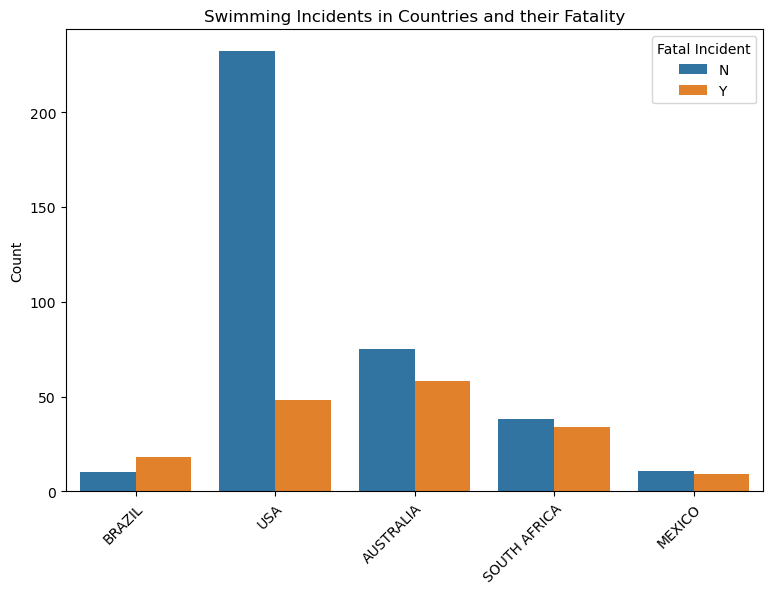

In [60]:
country_counts = shark_df[shark_df['Frequent_Activity'] == 'Swimming']['Top_Country'].value_counts()
relevant_countries = country_counts[country_counts >= 20].index.tolist()

swimming_df = shark_df[(shark_df['Frequent_Activity'] == 'Swimming')&(shark_df['Top_Country'].isin(relevant_countries))]

plt.figure(figsize=(9, 6))
sns.countplot(data=swimming_df, x='Top_Country', hue='fatal_incident',hue_order=['N','Y'] )
plt.title('Swimming Incidents in Countries and their Fatality')
plt.xlabel(' ')
plt.ylabel('Count')
plt.legend(title='Fatal Incident')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor' )
plt.show()


It can be seen that the country where the ratio of fatal to non-fatal attacks in swimming is exceptional compared to swimming attacks in the USA is. In addition, almost 50 percent of the attacks in South Africa is fatal.

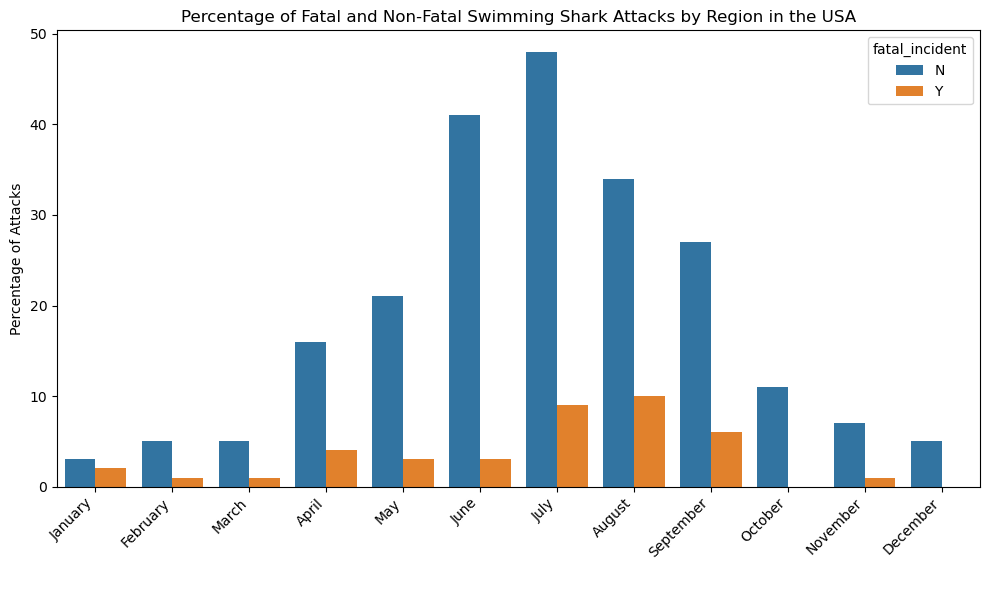

In [61]:
Swimming_USA_df = shark_df[(shark_df['Frequent_Activity'] == 'Swimming') & (shark_df['Top_Country'] == 'USA')]

plt.figure(figsize=(10, 6))
sns.countplot(data=Swimming_USA_df, x='Month', hue='fatal_incident')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Fatal and Non-Fatal Swimming Shark Attacks by Region in the USA')
plt.xlabel(' ')
plt.ylabel('Percentage of Attacks')

plt.tight_layout()
plt.show()

In this plot, we check which month have the minimal ratio between fatal and non-fatal attack.
We find that this month is June.

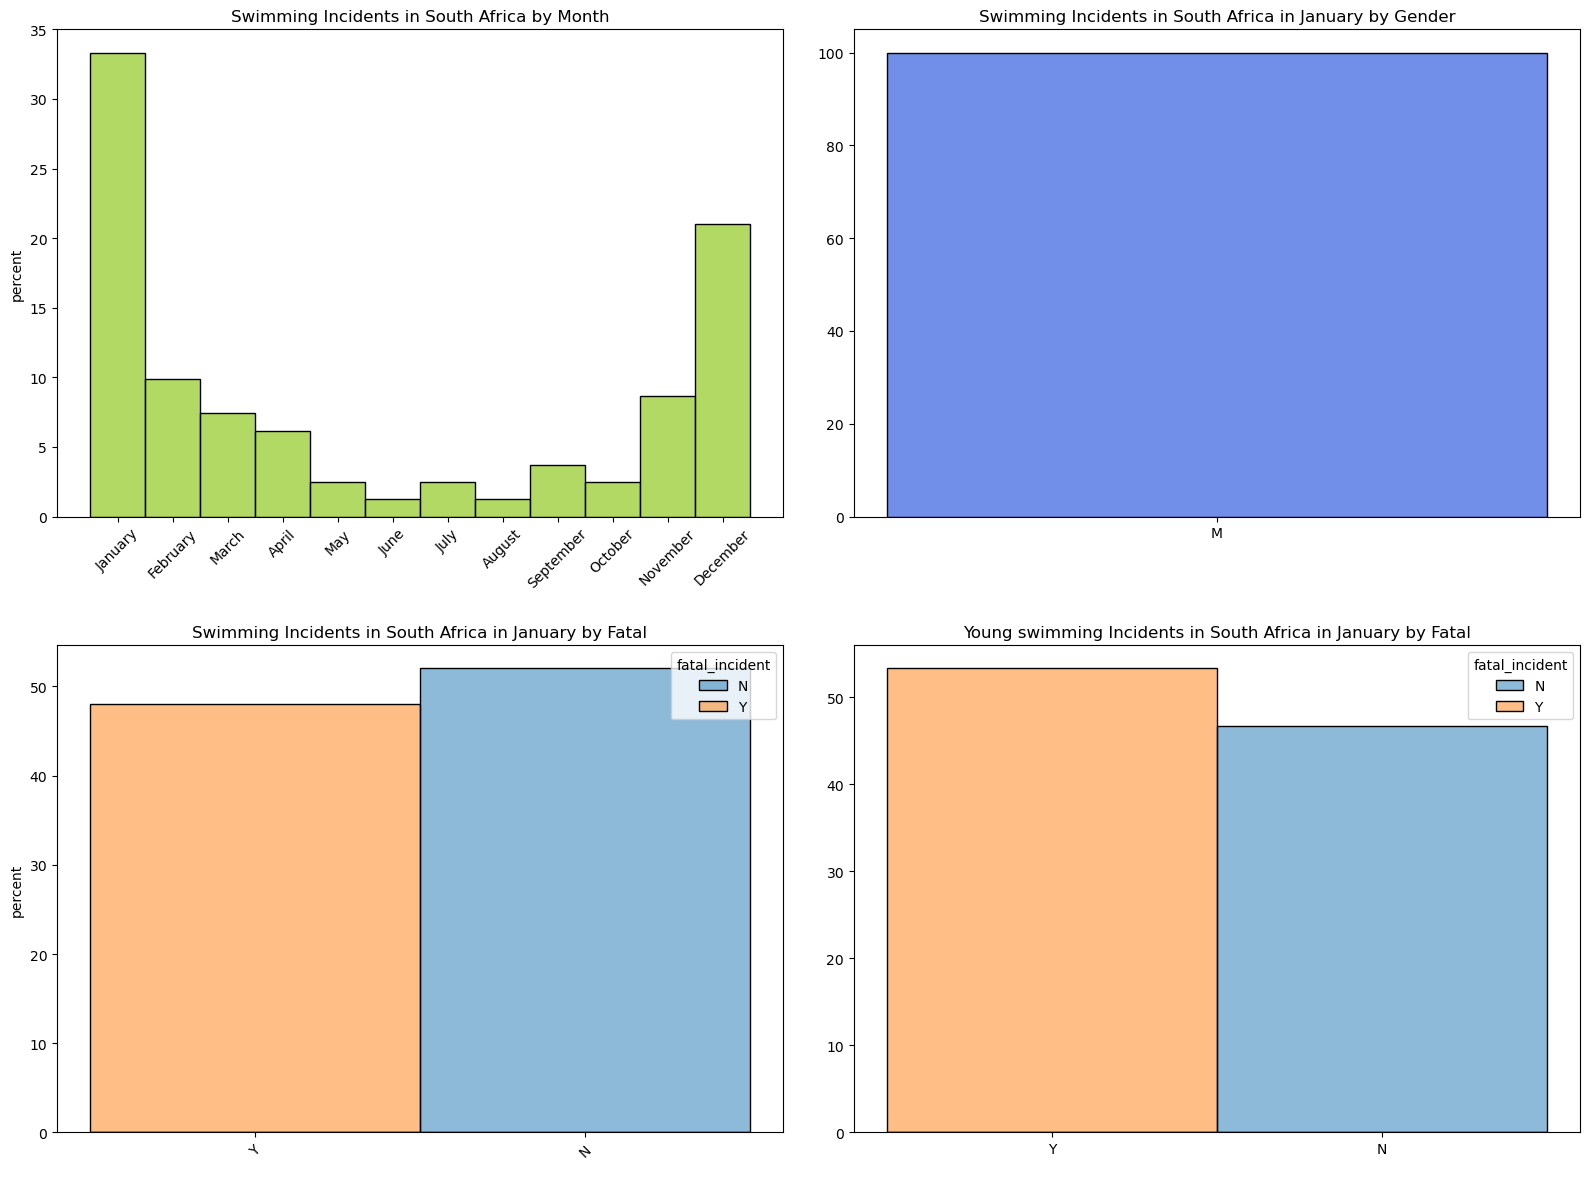

In [62]:

swim_South_Africa = shark_df[(shark_df['Frequent_Activity'] == 'Swimming') &
                       (shark_df['Top_Country'] == 'SOUTH AFRICA')]

swim_South_Africa_jan = shark_df[(shark_df['Frequent_Activity'] == 'Swimming') &
                       (shark_df['Top_Country'] == 'SOUTH AFRICA') &
                       (shark_df['Month'] == 'January')]

swim_South_Africa_jan_by_young = shark_df[(shark_df['Frequent_Activity'] == 'Swimming') &
                       (shark_df['Top_Country'] == 'SOUTH AFRICA') &
                        (shark_df['Month'] == 'January')&
                         (shark_df['age_bins'] == 'young')]
                   

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.histplot(data=swim_South_Africa, x='Month', ax=axes[0, 0] ,stat = 'percent', color='YellowGreen')
axes[0, 0].set_title('Swimming Incidents in South Africa by Month')
axes[0, 0].set_xlabel(' ')
axes[0, 0].set_ylabel('percent')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.histplot(data=swim_South_Africa_jan, x='Sex', ax=axes[0, 1] ,stat = 'percent' , color='RoyalBlue')
axes[0, 1].set_title('Swimming Incidents in South Africa in January by Gender')
axes[0, 1].set_xlabel(' ')
axes[0, 1].set_ylabel(' ')

sns.histplot(data=swim_South_Africa_jan, x='fatal_incident',  hue='fatal_incident' ,hue_order = ['N','Y'], ax=axes[1, 0] ,stat = 'percent')
axes[1, 0].set_title('Swimming Incidents in South Africa in January by Fatal')
axes[1, 0].set_xlabel(' ')
axes[1, 0].set_ylabel('percent')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.histplot(data=swim_South_Africa_jan_by_young, x='fatal_incident', hue='fatal_incident',hue_order = ['N','Y'], ax=axes[1, 1] ,stat = 'percent')
axes[1, 1].set_title('Young swimming Incidents in South Africa in January by Fatal')
axes[1, 1].set_xlabel(' ')
axes[1, 1].set_ylabel(' ')

plt.tight_layout()
plt.show()



We examined the most common marine activity and the most fatal marine activity. We discovered that surfing is the most common activity, followed by swimming. However, in terms of fatality, swimming is much more fatal than surfing.
It can be concluded that when it comes to swimming activity - in the USA in June, the chance of being fatally attacked is the lowest, while in South Africa in January, the chance of being attacked is the highest for men in the young age group.

## Conclusion 3

#### Examining Factors and Locations Influencing Attacks on Women that consider a Minority in Shark attacks.

<div>
<img src="https://github.com/YoavYekutiel/Project-attacks/blob/main/91uFbMFFhZS._AC_UF1000,1000_QL80_.jpg?raw=true" width="300"/>   
</div>


In [63]:
(shark_df['Sex'] == 'F').sum()


637

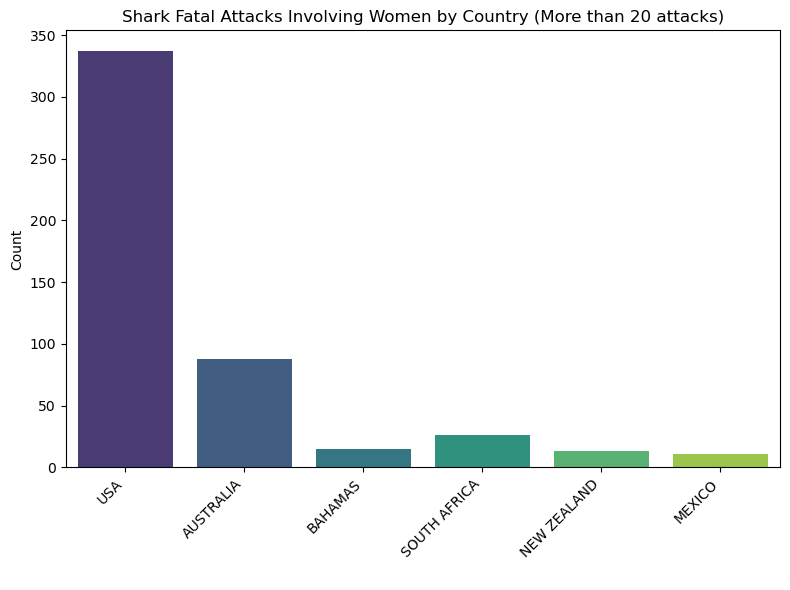

In [64]:
female_attacks = shark_df[(shark_df['Sex'] == 'F')]

attacks_counts_by_country = female_attacks['Top_Country'].value_counts()
selected_countries = attacks_counts_by_country[attacks_counts_by_country >=10].index

filtered_attacks = female_attacks[female_attacks['Top_Country'].isin(selected_countries)]


plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_attacks, x='Top_Country', palette='viridis')
plt.title('Shark Fatal Attacks Involving Women by Country (More than 20 attacks)')
plt.xlabel(' ')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

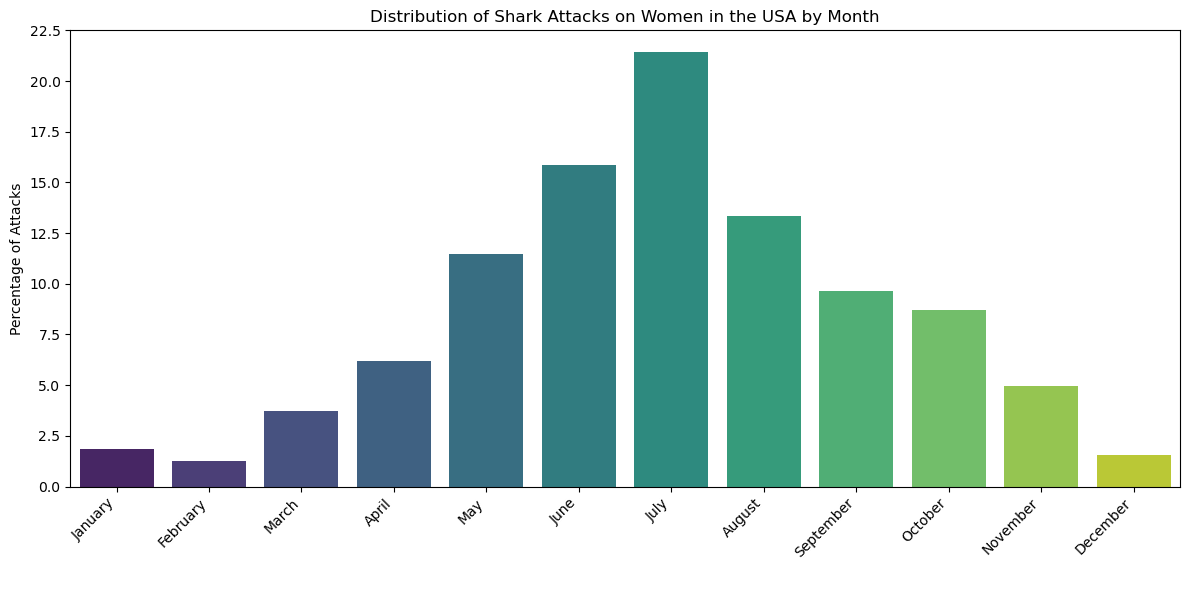

In [65]:
female_attacks_usa = shark_df[(shark_df['Sex'] == 'F') & (shark_df['Top_Country'] == 'USA')]

month_counts = female_attacks_usa['Month'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.title('Distribution of Shark Attacks on Women in the USA by Month')
plt.xlabel(' ')
plt.ylabel('Percentage of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


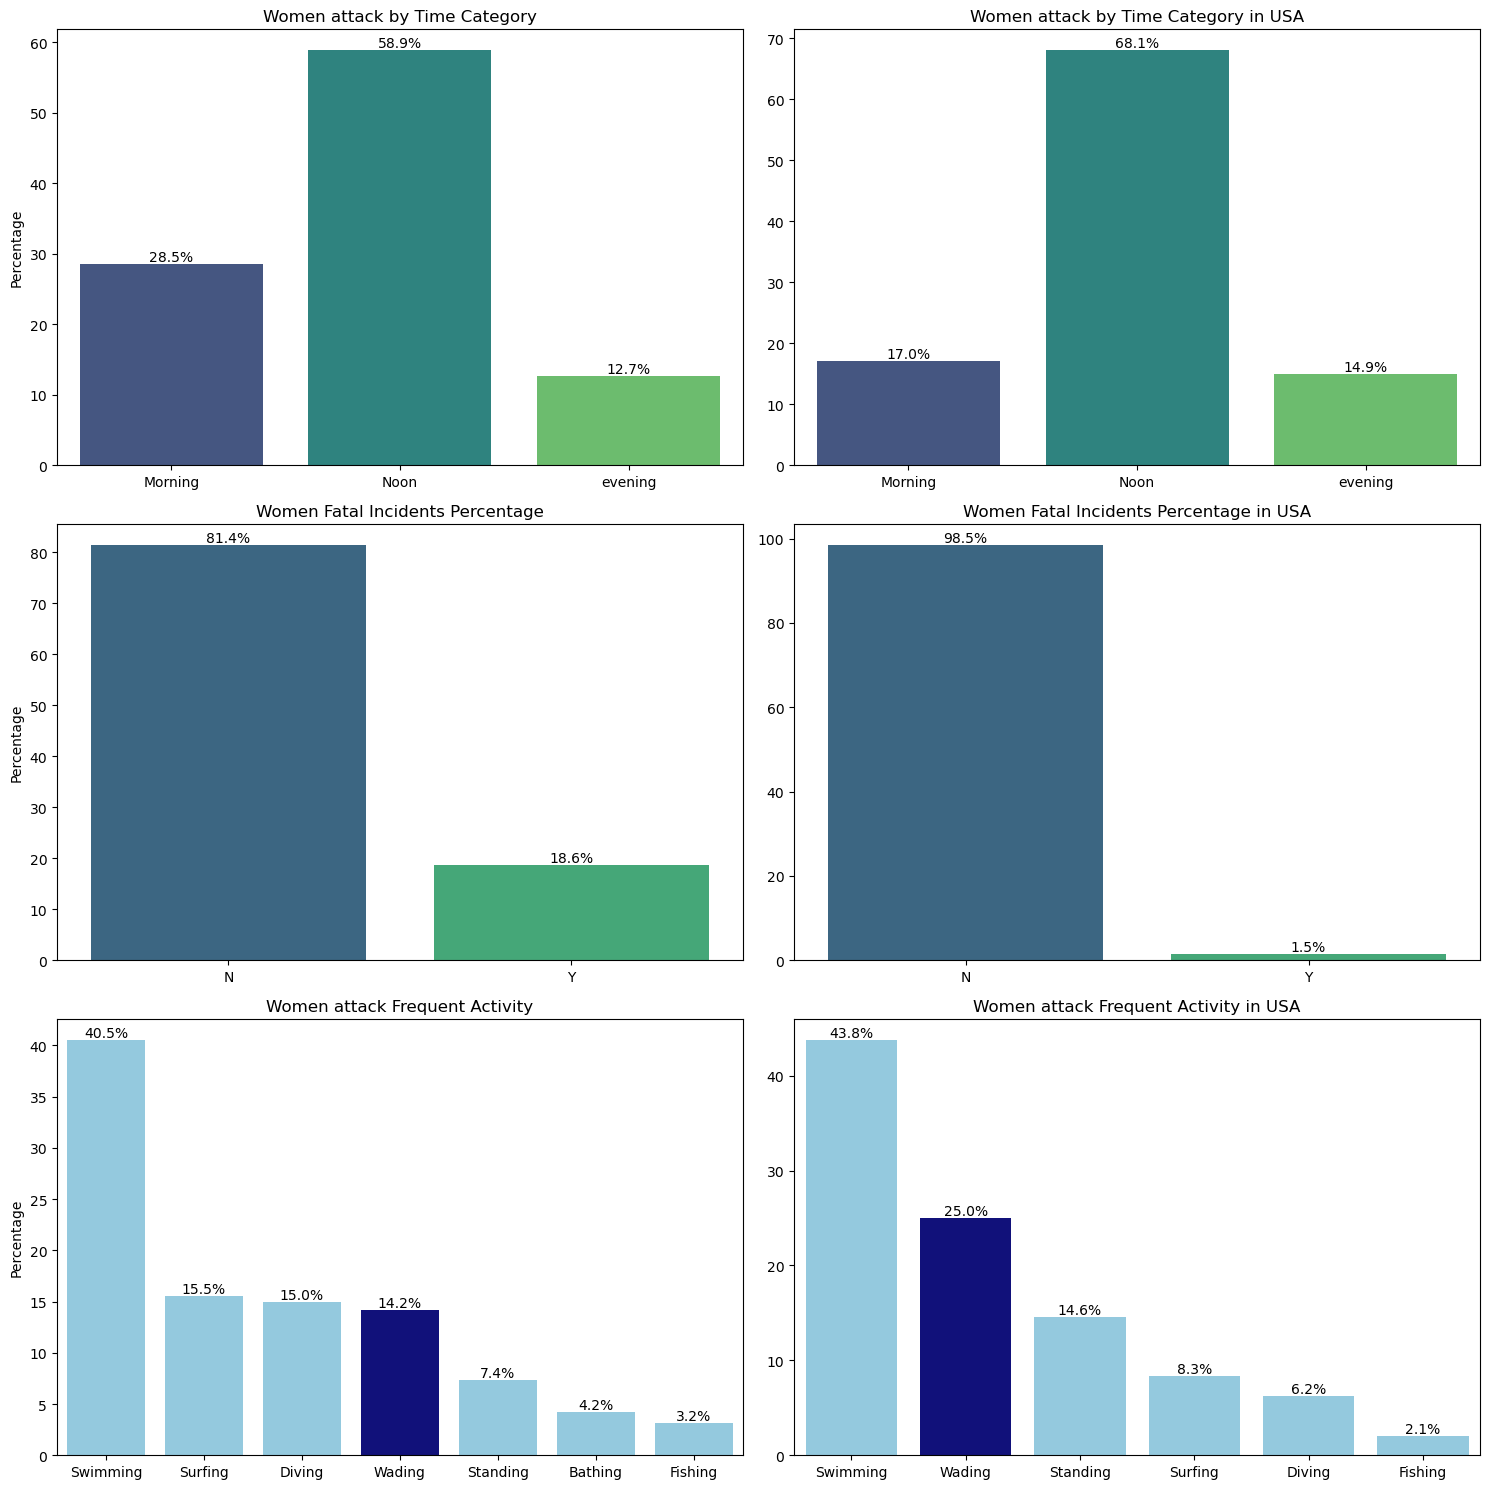

In [66]:


fig, ax = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.9)

time_category_counts = female_attacks['Time_Category'].value_counts(normalize=True) * 100
sns.barplot(x=time_category_counts.index, y=time_category_counts.values, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('Percentage')
ax[0, 0].set_title('Women attack by Time Category')

for p in ax[0, 0].patches:
    ax[0, 0].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

fatal_counts_by_female = female_attacks['fatal_incident'].value_counts(normalize=True) * 100
sns.barplot(x=fatal_counts_by_female.index, y=fatal_counts_by_female.values, ax=ax[1, 0], palette='viridis')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('Percentage')
ax[1, 0].set_title('Women Fatal Incidents Percentage')

for p in ax[1, 0].patches:
    ax[1, 0].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

activity_counts_by_female = female_attacks['Frequent_Activity'].value_counts(normalize=True) * 100
colors = ['darkblue' if activity == 'Wading' else 'skyblue' for activity in activity_counts_by_female.index]
sns.barplot(x=activity_counts_by_female.index, y=activity_counts_by_female.values, ax=ax[2, 0], palette=colors)
ax[2, 0].set_xlabel('')
ax[2, 0].set_ylabel('Percentage')
ax[2, 0].set_title('Women attack Frequent Activity')

for p in ax[2, 0].patches:
    ax[2, 0].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

female_attacks_usa_july = shark_df[(shark_df['Sex'] == 'F') & (shark_df['Top_Country'] == 'USA') & (shark_df['Month'] == 'July')]

time_category_counts = female_attacks_usa_july['Time_Category'].value_counts(normalize=True) * 100
sns.barplot(x=time_category_counts.index, y=time_category_counts.values, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_xlabel('')
ax[0, 1].set_title('Women attack by Time Category in USA')

for p in ax[0, 1].patches:
    ax[0, 1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

fatal_counts_by_female_usa_july = female_attacks_usa_july['fatal_incident'].value_counts(normalize=True) * 100
sns.barplot(x=fatal_counts_by_female_usa_july.index, y=fatal_counts_by_female_usa_july.values, ax=ax[1, 1], palette='viridis')
ax[1, 1].set_xlabel('')
ax[1, 1].set_title('Women Fatal Incidents Percentage in USA')

for p in ax[1, 1].patches:
    ax[1, 1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

activity_counts_by_female_usa_july = female_attacks_usa_july['Frequent_Activity'].value_counts(normalize=True) * 100
colors = ['darkblue' if activity == 'Wading' else 'skyblue' for activity in activity_counts_by_female_usa_july.index]
sns.barplot(x=activity_counts_by_female_usa_july.index, y=activity_counts_by_female_usa_july.values, ax=ax[2, 1], palette=colors)
ax[2, 1].set_xlabel('')
ax[2, 1].set_title('Women attack Frequent Activity in USA')

for p in ax[2, 1].patches:
    ax[2, 1].annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()



It can be concluded that the highest number of attacks on women occur in the USA in July, and compared to attacks on women worldwide, attacks on women in the USA are much less fatal. There are slightly more attacks occurring around noon and fewer in the morning hours. Regarding activities, in the USA there are more attacks during wading and fewer during surfing.We investigated in which area women are attacked in the largest numbers. We found that the highest number of attacks on women occurs in the USA in July, and compared to attacks on women worldwide, attacks in the USA are much less fatal relative to attacks on women in general. There are more attacks occurring around noon and fewer in the morning hours compared to attacks on women in general. Regarding activities, in the USA there are more attacks during wading and fewer during surfing compared to attacks on women in general.

<div>
<img src="https://github.com/YoavYekutiel/Project-attacks/blob/main/TTTTT7efab20b0f26a60b42a6cbc670a8a5ab.png?raw=true" width="800"/>   
<div>